# China Fintech Usage 

## Exploratory Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
file = '/Users/jessicaparker/Desktop/Data/county.xlsx'

In [3]:
data = pd.read_excel(file)
data = data.copy()
data.shape

(9120, 24)

In [4]:
data.isnull().sum()

year                       0
county_name                0
county_code_year14         0
prov_code                  0
prov_name                  0
pref_code                  0
pref_name                  1
index_aggregate            0
coverage_breadth           0
usage_depth                0
payment                    0
insurance                  0
monetary_fund              0
investment                 0
credit                     0
credit_investigation    1720
digitization_level         0
flb                     1263
gdp                      520
per_gdp                 3005
urban                   6034
industry                6052
ip                      7558
tradeopeness            6996
dtype: int64

### Explore the target variable

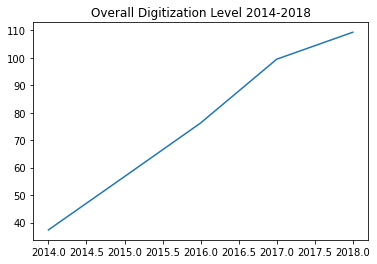

In [5]:
year_grouped = data.groupby("year")['digitization_level'].mean()
plt.title("Overall Digitization Level 2014-2018")
plt.plot(year_grouped)

In [6]:
print(matplotlib.matplotlib_fname())

/Users/jessicaparker/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [7]:
dig_sort = data.sort_values("digitization_level", ascending = False)
dig_sort = dig_sort[dig_sort["year"] == 2018].head(10)
dig_top_10_counties = dig_sort["county_name"]
dig_top_10 = dig_sort["digitization_level"]

In [8]:
[f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name]
matplotlib.rcParams['font.family'] = ['Heiti TC']
matplotlib.rcParams.update({'font.size': 14})


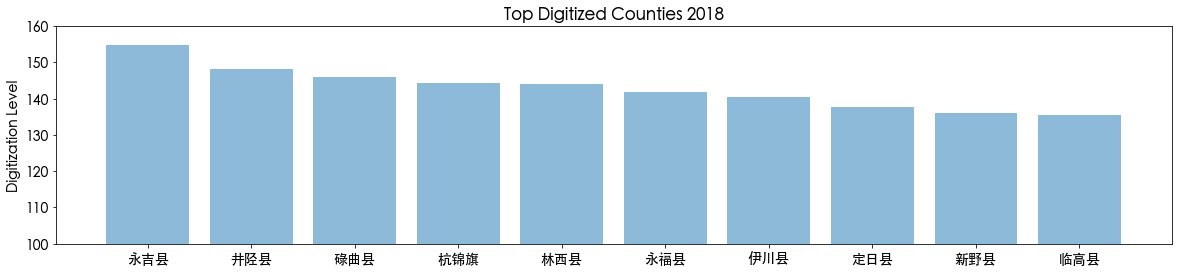

In [9]:
plt.figure(figsize=(20,4))
plt.bar(dig_top_10_counties, dig_top_10, align='center', alpha=0.5, )
plt.ylabel('Digitization Level')
plt.title('Top Digitized Counties 2018')
plt.ylim((100,160))
plt.show()

### Note to check on later: Can digitization have negative values??

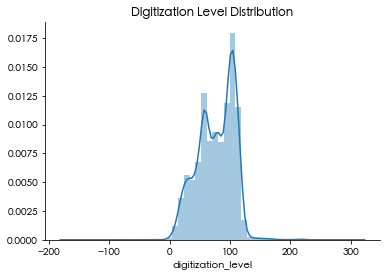

In [10]:
%matplotlib inline
def plot_dist(series=data["digitization_level"], title="Digitization Level Distribution"):
    sns.distplot(series)
    sns.despine()
    plt.title(title);
    plt.show()
plot_dist()

In [11]:
# We can also visualise binned digitization_level variable
data['digitization-bin'] = pd.cut(data['digitization_level'], bins = list(range(0, 200,18))).astype(str)
# Adjust bin so the sorting is correct
data.loc[data['digitization-bin'] == '(5, 10]', 'digitization-bin'] = '(05, 10]'

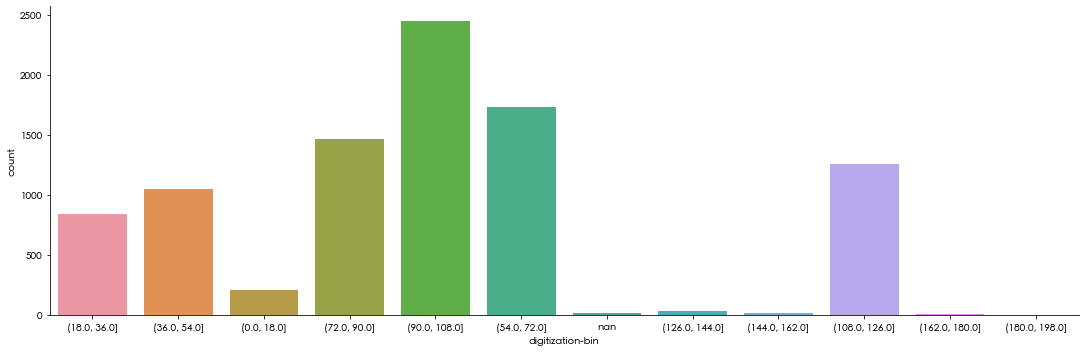

In [12]:
sns.catplot(x="digitization-bin", kind="count", data=data, height=5, aspect=3);
sns.despine()
plt.show()

## Data Cleaning 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 25 columns):
year                    9120 non-null int64
county_name             9120 non-null object
county_code_year14      9120 non-null int64
prov_code               9120 non-null int64
prov_name               9120 non-null object
pref_code               9120 non-null int64
pref_name               9119 non-null object
index_aggregate         9120 non-null float64
coverage_breadth        9120 non-null float64
usage_depth             9120 non-null float64
payment                 9120 non-null float64
insurance               9120 non-null float64
monetary_fund           9120 non-null float64
investment              9120 non-null float64
credit                  9120 non-null float64
credit_investigation    7400 non-null float64
digitization_level      9120 non-null float64
flb                     7857 non-null float64
gdp                     8600 non-null float64
per_gdp                 6115 n

In [14]:
data[data["year"]==2014].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 0 to 1719
Data columns (total 25 columns):
year                    1720 non-null int64
county_name             1720 non-null object
county_code_year14      1720 non-null int64
prov_code               1720 non-null int64
prov_name               1720 non-null object
pref_code               1720 non-null int64
pref_name               1720 non-null object
index_aggregate         1720 non-null float64
coverage_breadth        1720 non-null float64
usage_depth             1720 non-null float64
payment                 1720 non-null float64
insurance               1720 non-null float64
monetary_fund           1720 non-null float64
investment              1720 non-null float64
credit                  1720 non-null float64
credit_investigation    0 non-null float64
digitization_level      1720 non-null float64
flb                     1719 non-null float64
gdp                     1719 non-null float64
per_gdp                 1227 non-

## Filling in missing GDP values

GDP for 2018 was missing for all counties. The value was filled in by the GDP from the previous year and adjusted according to the overall GDP growth rate of 2018 which is 6.7 percent according to the World Bank. 

In [42]:
grouped_by_county_code_and_year = data.sort_values(["county_code_year14","year"])
grouped_by_county_code_and_year["gdp"].fillna(method = "ffill", inplace = True)
grouped_by_county_code_and_year["gdp_filled"] = grouped_by_county_code_and_year["gdp"]
data = grouped_by_county_code_and_year
data[data["year"]==2018]["gdp_filled"] = data[data["year"]==2018]["gdp_filled"]*1.07

/Users/jessicaparker/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,year,county_name,county_code_year14,prov_code,prov_name,pref_code,pref_name,index_aggregate,coverage_breadth,usage_depth,...,digitization_level,flb,gdp,per_gdp,urban,industry,ip,tradeopeness,digitization-bin,gdp_filled
132,2014,井陉县,130121,13,河北省,1301,石家庄市,49.40,47.42,61.03,...,34.80,530867.0,1400000.0,NaN,NaN,0.421721,0.102594,NaN,"(18.0, 36.0]",1400000.0
1852,2015,井陉县,130121,13,河北省,1301,石家庄市,65.65,68.48,66.66,...,54.46,531196.0,1400000.0,NaN,0.126406,0.376754,0.120606,0.003573,"(54.0, 72.0]",1400000.0
3587,2016,井陉县,130121,13,河北省,1301,石家庄市,87.23,89.63,82.10,...,88.65,607906.0,1500000.0,NaN,0.125987,0.361026,0.150075,NaN,"(72.0, 90.0]",1500000.0
5480,2017,井陉县,130121,13,河北省,1301,石家庄市,98.51,90.83,118.22,...,88.03,611389.0,1600000.0,NaN,NaN,NaN,0.175129,NaN,"(72.0, 90.0]",1600000.0
7368,2018,井陉县,130121,13,河北省,1301,石家庄市,105.91,88.35,114.55,...,148.24,NaN,1600000.0,NaN,NaN,NaN,NaN,NaN,"(144.0, 162.0]",1600000.0
939,2014,正定县,130123,13,河北省,1301,石家庄市,73.73,92.37,62.39,...,32.81,2100000.0,2500000.0,NaN,NaN,0.371219,0.170396,0.084869,"(18.0, 36.0]",2500000.0
2659,2015,正定县,130123,13,河北省,1301,石家庄市,94.87,116.61,76.39,...,56.65,2300000.0,2800000.0,NaN,0.198100,0.371087,0.186244,0.025399,"(54.0, 72.0]",2800000.0
4470,2016,正定县,130123,13,河北省,1301,石家庄市,91.01,97.90,88.25,...,73.27,2600000.0,2900000.0,NaN,0.133275,0.359345,0.186014,0.020294,"(72.0, 90.0]",2900000.0
6355,2017,正定县,130123,13,河北省,1301,石家庄市,106.32,98.28,124.22,...,100.30,2600000.0,3000000.0,NaN,NaN,NaN,0.190430,0.022652,"(90.0, 108.0]",3000000.0
8251,2018,正定县,130123,13,河北省,1301,石家庄市,108.07,97.23,125.81,...,111.63,NaN,3000000.0,NaN,NaN,NaN,NaN,NaN,"(108.0, 126.0]",3000000.0


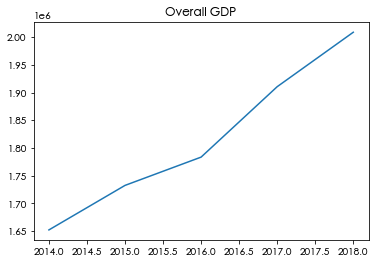

In [43]:
gdp = data.groupby("year")["gdp_filled"].mean()
gdp_mean = data.groupby("year")["gdp_filled"].median()
plt.title("Overall GDP")
plt.plot(gdp)

## Missing values for the Credit Investigation Column

In [ ]:
grouped_by_county_code

### Filling in the Null Values
Note: Credit Investigation for 2014 is missing for all counties..no way that this is the first year it was being documented? How should these values be filled in?

In [ ]:
data['credit_investigation'].value_counts(dropna = False)

def plot_dist(series=data["credit_investigation"], title="Credit Investigation Distribution"):
    sns.distplot(series)
    sns.despine()
    plt.title(title);
    plt.show()
    
plot_dist()

In [ ]:
data['credit_investigation'].max(),data['credit_investigation'].mean(), data['credit_investigation'].median()

In [ ]:
grouped_by_county_code[["year","county_name","credit_investigation"]]

## Missing Values for flb Column

#### Missing values for flb column have been filled following the trend and have been increased by 59%.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9120 entries, 132 to 3578
Data columns (total 26 columns):
year                    9120 non-null int64
county_name             9120 non-null object
county_code_year14      9120 non-null int64
prov_code               9120 non-null int64
prov_name               9120 non-null object
pref_code               9120 non-null int64
pref_name               9119 non-null object
index_aggregate         9120 non-null float64
coverage_breadth        9120 non-null float64
usage_depth             9120 non-null float64
payment                 9120 non-null float64
insurance               9120 non-null float64
monetary_fund           9120 non-null float64
investment              9120 non-null float64
credit                  9120 non-null float64
credit_investigation    7400 non-null float64
digitization_level      9120 non-null float64
flb                     7857 non-null float64
gdp                     9120 non-null float64
per_gdp                 6115

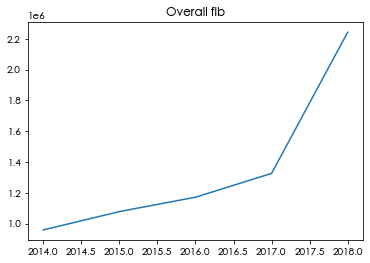

In [45]:
flb = data.groupby("year")["flb"].mean()
flb_median = data.groupby("year")["flb"].median()
plt.title("Overall flb")
plt.plot(flb)

In [ ]:
##flb is a 66% increase??

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9120 entries, 132 to 3578
Data columns (total 27 columns):
year                    9120 non-null int64
county_name             9120 non-null object
county_code_year14      9120 non-null int64
prov_code               9120 non-null int64
prov_name               9120 non-null object
pref_code               9120 non-null int64
pref_name               9119 non-null object
index_aggregate         9120 non-null float64
coverage_breadth        9120 non-null float64
usage_depth             9120 non-null float64
payment                 9120 non-null float64
insurance               9120 non-null float64
monetary_fund           9120 non-null float64
investment              9120 non-null float64
credit                  9120 non-null float64
credit_investigation    7400 non-null float64
digitization_level      9120 non-null float64
flb                     7857 non-null float64
gdp                     9120 non-null float64
per_gdp                 6115

In [46]:
data["flb_filled"] = grouped_by_county_code["flb"].fillna(method = "ffill")
data_2018 = grouped_by_county_code[grouped_by_county_code["year"] == 2018]
#data_2018["gdp_filled"] = data_2018["gdp_filled"]*1.07
data_2018["flb_filled"] = data[data["year"] == 2018]["flb_filled"]
data[data["year"] == 2018]

/Users/jessicaparker/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,year,county_name,county_code_year14,prov_code,prov_name,pref_code,pref_name,index_aggregate,coverage_breadth,usage_depth,...,flb,gdp,per_gdp,urban,industry,ip,tradeopeness,digitization-bin,gdp_filled,flb_filled
7368,2018,井陉县,130121,13,河北省,1301,石家庄市,105.91,88.35,114.55,...,NaN,1600000.0,NaN,NaN,NaN,NaN,NaN,"(144.0, 162.0]",1600000.0,531196.0
8251,2018,正定县,130123,13,河北省,1301,石家庄市,108.07,97.23,125.81,...,NaN,3000000.0,NaN,NaN,NaN,NaN,NaN,"(108.0, 126.0]",3000000.0,2300000.0
8774,2018,行唐县,130125,13,河北省,1301,石家庄市,88.58,81.97,95.49,...,NaN,1200000.0,NaN,NaN,NaN,NaN,NaN,"(90.0, 108.0]",1200000.0,2600000.0
8505,2018,灵寿县,130126,13,河北省,1301,石家庄市,94.14,87.95,104.59,...,NaN,1000000.0,NaN,NaN,NaN,NaN,NaN,"(90.0, 108.0]",1000000.0,511926.0
9072,2018,高邑县,130127,13,河北省,1301,石家庄市,99.35,89.78,112.37,...,NaN,865889.0,NaN,NaN,NaN,NaN,NaN,"(90.0, 108.0]",865889.0,247000.0
8443,2018,深泽县,130128,13,河北省,1301,石家庄市,97.89,90.04,124.64,...,NaN,1000000.0,NaN,NaN,NaN,NaN,NaN,"(72.0, 90.0]",1000000.0,265752.0
8818,2018,赞皇县,130129,13,河北省,1301,石家庄市,95.13,85.96,100.59,...,NaN,889038.0,NaN,NaN,NaN,NaN,NaN,"(108.0, 126.0]",889038.0,302560.0
8121,2018,无极县,130130,13,河北省,1301,石家庄市,96.82,88.28,107.00,...,NaN,2000000.0,NaN,NaN,NaN,NaN,NaN,"(90.0, 108.0]",2000000.0,302560.0
7921,2018,平山县,130131,13,河北省,1301,石家庄市,96.88,88.53,105.94,...,NaN,2400000.0,NaN,NaN,NaN,NaN,NaN,"(90.0, 108.0]",2400000.0,518217.0
7423,2018,元氏县,130132,13,河北省,1301,石家庄市,99.08,89.93,108.53,...,NaN,1900000.0,NaN,NaN,NaN,NaN,NaN,"(108.0, 126.0]",1900000.0,744523.0


In [ ]:
grouped_by_county_code[["year","county_name","flb"]]